In [1]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine")
from distribution_operation import *
from utils import *
from numerical_routine import *
from posterior_computation import *
from ash import *

ModuleNotFoundError: No module named 'distribution_operation'

In [ ]:
betahat=  np.array([1,2,3,4,5])
sebetahat=np.array([1,0.4,5,1,1])

res= ash(betahat, sebetahat, mult=np.sqrt(2),mode=2)
print(res.post_mean)
mult=2

print(res.log_lik)

scale=autoselect_scales_mix_norm(betahat  = betahat,
                                         sebetahat= sebetahat,
                                         mult=np.sqrt(2))
location=0*scale+2
print(len(location.shape))

[1.97808877 2.         2.00759421 2.14860704 3.15034247]
-11.772394073433777
1


In [3]:
L= get_data_loglik_normal(betahat=betahat ,
                                 sebetahat=sebetahat ,
                                 location=location,
                                 scale=scale)
optimal_pi = optimize_pi( np.exp(L),
                                 penalty=10,
                                 verbose=True) 
optimal_pi
 

array([9.56721745e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.58603289e-17, 1.58603289e-17,
       7.08349778e-07, 4.31668575e-02, 1.10688684e-04, 9.85782884e-13,
       1.58603289e-17, 0.00000000e+00])

In [4]:
location

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2.])

In [5]:
data_loglik = get_data_loglik_normal (  betahat,sebetahat, location, scale)

In [6]:
log_pi =np.log(optimal_pi+1e-32)

optimal_pi 

array([9.56721745e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.58603289e-17, 1.58603289e-17,
       7.08349778e-07, 4.31668575e-02, 1.10688684e-04, 9.85782884e-13,
       1.58603289e-17, 0.00000000e+00])

In [7]:

L= get_data_loglik_normal(betahat=betahat ,
                                 sebetahat=sebetahat ,
                                 location=location,
                                 scale=scale)
optimal_pi = optimize_pi( np.exp(L),
                                 penalty=10,
                                 verbose=True) 
 

In [8]:

log_pi =np.log(optimal_pi+1e-32)

optimal_pi 

array([9.56721745e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.58603289e-17, 1.58603289e-17,
       7.08349778e-07, 4.31668575e-02, 1.10688684e-04, 9.85782884e-13,
       1.58603289e-17, 0.00000000e+00])

In [9]:
data_loglik = get_data_loglik_normal (  betahat,sebetahat, location, scale)
log_post_assignment = apply_log_sum_exp(data_loglik, log_pi)
t_ind_Var =np.zeros((betahat.shape[0], scale.shape[0]))
 
for i in range(t_ind_Var.shape[0]):
        t_ind_Var[i , ]= np.concatenate(
                                        ([0], 
                                         1/((1/sebetahat[i]**2)+ (1/scale[1:]**2)) )
                                        )#assume that first entry of scale is 0
        
temp=np.zeros((betahat.shape[0], scale.shape[0]))

for i in range(temp.shape[0]):
        temp[i,] = (t_ind_Var[i,]/(sebetahat[i]**2))*(betahat[i] )+ location*(1-t_ind_Var[i,]/(sebetahat[i]**2))

post_mean  = np.sum ( np.exp(log_post_assignment)* temp, axis=1)
post_mean2 = np.sum ( np.exp(log_post_assignment)*( t_ind_Var+ temp**2), axis=1)
post_sd    = np.sqrt(post_mean2-post_mean**2) 

In [10]:
post_mean

array([1.97808876, 2.        , 2.0075942 , 2.14860708, 3.15034251])

In [11]:
data_loglik = get_data_loglik_normal (  betahat,sebetahat, location, scale)
log_post_assignment = apply_log_sum_exp(data_loglik, log_pi)
t_ind_Var =np.zeros((betahat.shape[0], scale.shape[0]))
 
for i in range(t_ind_Var.shape[0]):
        t_ind_Var[i , ]= np.concatenate(
                                        ([0], 
                                         1/((1/sebetahat[i]**2)+ (1/scale[1:]**2)) )
                                        )#assume that first entry of scale is 0
        
temp=np.zeros((betahat.shape[0], scale.shape[0]))

for i in range(temp.shape[0]):
        temp[i,] = (t_ind_Var[i,]/(sebetahat[i]**2))*(betahat[i] )+ location*(1-t_ind_Var[i,]/(sebetahat[i]**2))

post_mean  = np.sum ( np.exp(log_post_assignment)* temp, axis=1)
post_mean2 = np.sum ( np.exp(log_post_assignment)*( t_ind_Var+ temp**2), axis=1)
post_sd    = np.sqrt(post_mean2-post_mean**2) 

In [13]:
post_mean

array([1.97808876, 2.        , 2.0075942 , 2.14860708, 3.15034251])

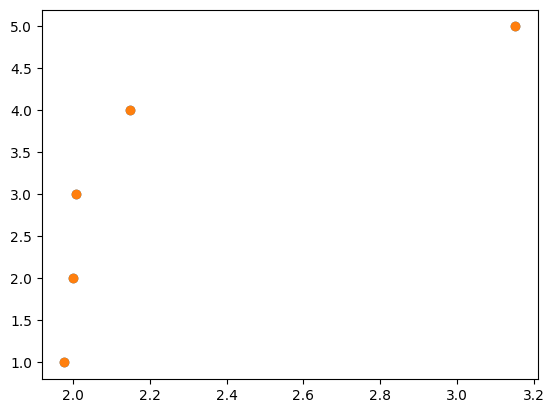

In [12]:
plt.scatter(post_mean, betahat)
res= ash(betahat,sebetahat, mode=2)
plt.scatter(res.post_mean, betahat)

In [14]:
scale=autoselect_scales_mix_norm(betahat  = betahat,
                                         sebetahat= sebetahat,
                                         mult=np.sqrt(2))

location=scale
print (location)
if location is None:
    print(1)
else:
    print(2)

location=None
location is None

[0.         0.03827328 0.05412659 0.07654655 0.10825318 0.15309311
 0.21650635 0.30618622 0.4330127  0.61237244 0.8660254  1.22474487
 1.73205081 2.44948974 3.46410162 4.89897949 6.92820323 9.79795897]
2


True